In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.neighbors
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

This is a Classification Problem in which you'll classify a customer based on his/her Credit Score,
Region, Gender, Age, Tenure, Balance, Salary etc. whether he/she will EXIT(1) or

In [4]:
df.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df = df.drop(df.columns[[0,1,2]], axis=1)

In [6]:
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

In [7]:
normalize_numeric_minmax(df,"CreditScore")
normalize_numeric_minmax(df,"Age")
normalize_numeric_minmax(df,"Tenure")
normalize_numeric_minmax(df,"Balance")
normalize_numeric_minmax(df,"EstimatedSalary")

In [8]:
normalize_numeric_minmax(df,"NumOfProducts")

In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,France,Female,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,France,Female,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,Spain,Female,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,France,Male,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0
9996,0.332,France,Male,0.229730,1.0,0.228657,0.000000,1,1,0.508489,0
9997,0.718,France,Female,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1
9998,0.844,Germany,Male,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1


In [10]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [11]:
encode_text_dummy(df, 'Geography')
encode_text_dummy(df, 'Gender')

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography-France,Geography-Germany,Geography-Spain,Gender-Female,Gender-Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0,0,1
9996,0.332,0.229730,1.0,0.228657,0.000000,1,1,0.508489,0,1,0,0,0,1
9997,0.718,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0,1,0
9998,0.844,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0,0,1


In [21]:
x = df.drop('Exited', axis=1)
y = df[['Exited']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [22]:
y.shape

(10000, 1)

In [23]:
x.shape

(10000, 13)

In [25]:
from sklearn import tree
clf4 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf4 = clf4.fit(x, y)

In [26]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

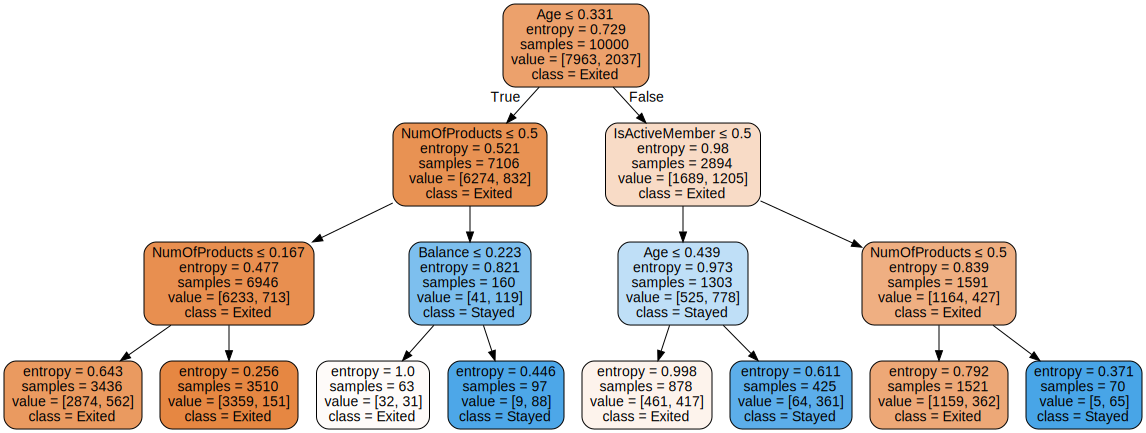

In [29]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=x.columns,  
                      class_names=['Exited','Stayed'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model

Text(0, 0.5, 'Accuracy')

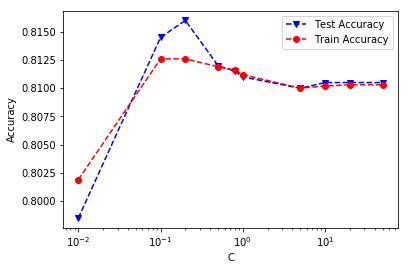

In [34]:
from sklearn.linear_model import LogisticRegression


C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(x,y)
    log_reg_pred = clf.predict(x_test)
    log_reg_pred_train = clf.predict(x)
    print(log_reg_pred)
    LRtestAcc.append(accuracy_score(y_test, log_reg_pred))
    LRtrainAcc.append(accuracy_score(y,log_reg_pred_train))
    
    

plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]


C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]


C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]


C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]


C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]


C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]


C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]


C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]


C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]


C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]


Text(0, 0.5, 'Accuracy')

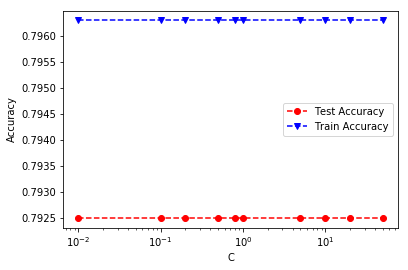

In [35]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMLtestAcc = []
SVMLtrainAcc = []



for param in C:
    clf3 = SVC(C=param,kernel='linear')
    clf3.fit(x,y)
    svml_pred = clf3.predict(x_test)
    svml_pred_train = clf3.predict(x)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(y_test, svml_pred))
    SVMLtrainAcc.append(accuracy_score(y,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

C:\Users\ALEX\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


[0 0 0 ... 0 0 0]


C:\Users\ALEX\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


[0 0 0 ... 0 0 0]


C:\Users\ALEX\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


[0 0 0 ... 0 0 0]


Text(0, 0.5, 'Accuracy')

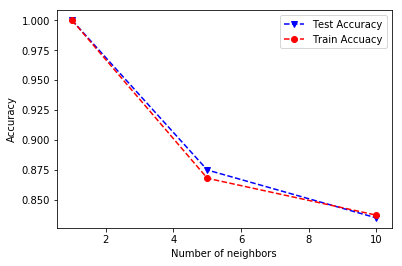

In [37]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf2.fit(x,y)
    knn_pred = clf2.predict(x_test)
    knn_pred_train = clf2.predict(x)
    print(knn_pred)
    testAcc.append(accuracy_score(y_test, knn_pred))
    trainAcc.append(accuracy_score(y,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [38]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(x,y)
NB_pred = clf_NB.predict(x_test)
print(NB_pred)

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, NB_pred)))

[0 0 0 ... 0 0 0]
Accuracy on test data is 0.82


C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
